# TUTORIAL: Graph theory with NetworkX

*Introduction to Computational Neuroscience, Charles University, Winter 2025-26*

*Tutor: Dr. Aitor Morales-Gregorio*

## Installation instructions

For this tutorial and exercises you will need the following packages:
* NetworkX
* numpy
* pandas
* matplotlib
* scipy

### Creating a new environment

You can create a new conda environment with python3, jupyterlab:
```
conda env create -n nx python=3 jupyterlab
```

Activate it:
```
conda activate nx
```

You do not have to create a new environment if you already have one!

Install the dependencies listed above (I like to use `pip` for this, you can also use `conda` of course):
```
pip install numpy 
pip install matplotlib 
pip install jupyterlab
pip install pandas
pip install scipy
```

Finally, you can install `networkx` in your environment.
```
pip install networkx
```

# Introduction

A graph is what we commonly know as a Network. Any graph is composed of two fundamental parts or sets.
* A set of vertices (or nodes) $V$,
* and s set of edges (connections or links) $E$,

so that mathematically a graph is an ordered pair $G=(V,E)$.

Graphs can be:
* **Undirected**, any connection goes both ways (e.g. a bridge in a map)
* **Directed**, connections have a start and an end (e.g. following someone on Twitter)

Any graph, not matter if directed or not, can be **weighted** too. In a weighted graph the edges are not just a True/False dichotomy but can actually represent some magnitude, e.g. distance in a map between two intersections, strength of the connection between two neurons etc.

If more than one connection can exist between two nodes in a graph then we have a **multi-graph**, e.g. several roads that connect two intersections in a map.

### Examples 
Graphs are everywhere around us, simple examples include:
* Friendships in social networks, which can be:
    * Undirected (e.g. Facebook)
    * Directed (e.g. Twitter, Instagram)
* Maps (each location is a node and the roads are the edges)
    * Undirected (e.g. a hiking trails map)
    * Directed (e.g. car traffic with one way streets)
* Connections between neurons in your brain
    * Undirected (e.g. gap junctions)
    * Directed (e.g. synapses)

### NetworkX
In this part we will use the `NetworkX` package for graph analysis and learn the basic properties of graphs and how to calculate them both in small synthetic examples and in real networks of the connectivity of the brain in macaques.

The following basic graph types are provided as Python classes:

`Graph`

This class implements an undirected graph. It ignores multiple edges between two nodes. It does allow self-loop edges between a node and itself.

`DiGraph`

Directed graphs, that is, graphs with directed edges. Provides operations common to directed graphs, (a subclass of Graph).

`MultiGraph`

A flexible graph class that allows multiple undirected edges between pairs of nodes. The additional flexibility leads to some degradation in performance, though usually not significant.

`MultiDiGraph`

A directed version of a MultiGraph.


# Creating a graph from zero

This tutorial partially follows the tutorials in the official NetworkX  [documentation](https://networkx.github.io/documentation/stable/tutorial.html), feel free to go there to get some further insight into the NetworkX package and graph analysis in general.

## Undirected unweighted graphs

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

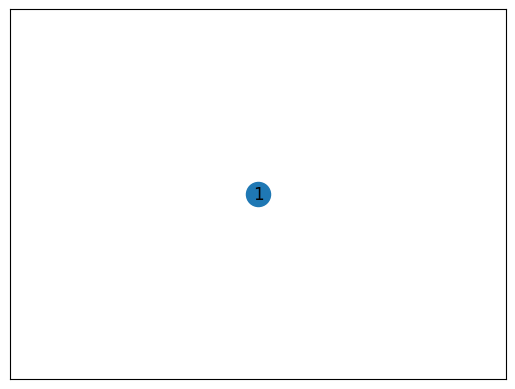

In [12]:
# This creates a new network
G = nx.Graph()

# You can add a node (in this case the node is called "1")
G.add_node(1)
nx.draw_networkx(G)

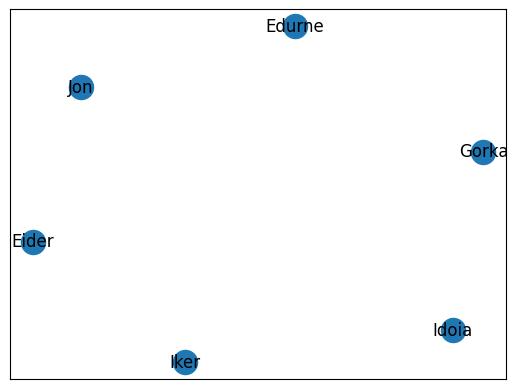

In [13]:
# Or you can add other more meaningful nodes all from a list
G = nx.Graph()

# The names of the nodes can be strings as well
G.add_nodes_from(['Iker', 'Jon', 'Eider', 'Idoia', 'Edurne', 'Gorka'])
nx.draw_networkx(G, with_labels=True)

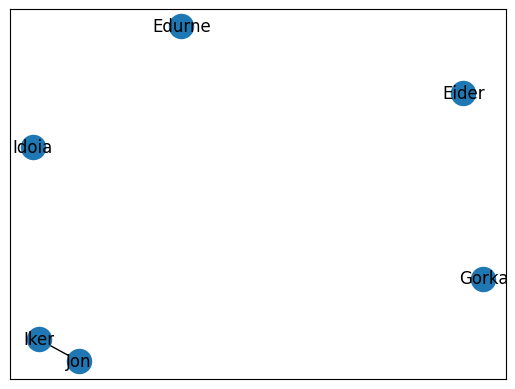

In [14]:
# Adding edges is pretty much the same, just with tuples instead of single values
G.add_edge('Iker', 'Jon')
nx.draw_networkx(G, with_labels=True)

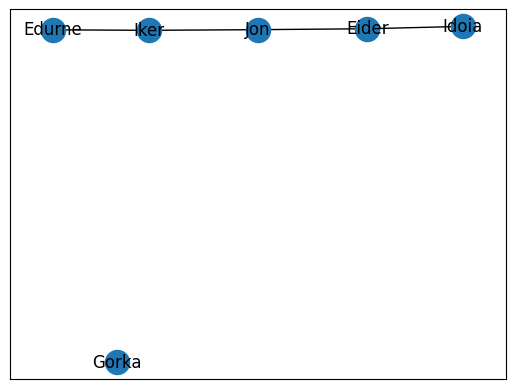

In [15]:
# You can also add several edges at once
G.add_edges_from([('Jon', 'Eider'), ('Eider', 'Idoia'), ('Edurne', 'Iker')])
nx.draw_networkx(G, with_labels=True)

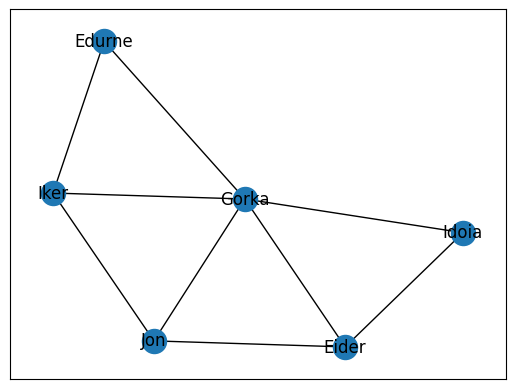

In [16]:
# Or even iteratively add edges
for node in list(G.nodes):
    if node != 'Gorka':
        G.add_edge('Gorka', node)
nx.draw_networkx(G, with_labels=True)

### Graph components
After creating a graph we can study some of its basic properties. First of all we can access the nodes and edges of the graph, which are attributes of `G`.

In [17]:
# Print out the nodes
print('-- List of nodes')
print(G.nodes)

# Print our the edges
print('\n-- List of edges')
print(G.edges)

-- List of nodes
['Iker', 'Jon', 'Eider', 'Idoia', 'Edurne', 'Gorka']

-- List of edges
[('Iker', 'Jon'), ('Iker', 'Edurne'), ('Iker', 'Gorka'), ('Jon', 'Eider'), ('Jon', 'Gorka'), ('Eider', 'Idoia'), ('Eider', 'Gorka'), ('Idoia', 'Gorka'), ('Edurne', 'Gorka')]


### Adjacency matrix
Working with a list of edges is not very convenient, performing operations on a graph is very difficult that way. An often used structure is the 'adjacency matrix' (usually called $A$). The adjacency matrix is a square matrix of size NxN, where N is the number of nodes in the graph. The entries in the adjacency matrix are `0` if two nodes are not connected and `1` if they are connected. `NetworkX` uses the adjacency matrix for most of the more complex algorithms and it can also calculate the adjacency matrix from any given graph like so:

In [18]:
# One can get the adjacency matrix
A = nx.adjacency_matrix(G)
print('-- This is a Scipy sparse matrix:\n')
print(A)

print('\n-- This is a numpy matrix:\n')
print(A.todense())

# We can actually use pandas to also have the actualy area names in there
print('\n-- Pandas can get you an annotated matrix, so you know who is connected to whom!\n')
annotated_A = pd.DataFrame(A.todense(), index=G.nodes, columns=G.nodes)
print(annotated_A)

-- This is a Scipy sparse matrix:

<Compressed Sparse Row sparse array of dtype 'int64'
	with 18 stored elements and shape (6, 6)>
  Coords	Values
  (0, 1)	1
  (0, 4)	1
  (0, 5)	1
  (1, 0)	1
  (1, 2)	1
  (1, 5)	1
  (2, 1)	1
  (2, 3)	1
  (2, 5)	1
  (3, 2)	1
  (3, 5)	1
  (4, 0)	1
  (4, 5)	1
  (5, 0)	1
  (5, 1)	1
  (5, 2)	1
  (5, 3)	1
  (5, 4)	1

-- This is a numpy matrix:

[[0 1 0 0 1 1]
 [1 0 1 0 0 1]
 [0 1 0 1 0 1]
 [0 0 1 0 0 1]
 [1 0 0 0 0 1]
 [1 1 1 1 1 0]]

-- Pandas can get you an annotated matrix, so you know who is connected to whom!

        Iker  Jon  Eider  Idoia  Edurne  Gorka
Iker       0    1      0      0       1      1
Jon        1    0      1      0       0      1
Eider      0    1      0      1       0      1
Idoia      0    0      1      0       0      1
Edurne     1    0      0      0       0      1
Gorka      1    1      1      1       1      0


REMEMBER: The graph we have created so far is **undirected**! This means that the **adjacency matrix is symmetric**! The adjacency matrix of any undirected graph will always be symmetric.

### Node degree
The degree of a node is essentially how many connections that node has. In other words, how many edges start (or end, there is no difference in undirected graphs) at any given node. NetworkX provides a built in `.degree()` method, but one can also very easily calculate the degree by adding together the rows (or columns) of the adjacency matrix.

-- Degrees calculated by NetworkX

[('Iker', 3), ('Jon', 3), ('Eider', 3), ('Idoia', 2), ('Edurne', 2), ('Gorka', 5)]

-- Sum of the **columns** of the adjacency matrix

Iker      3
Jon       3
Eider     3
Idoia     2
Edurne    2
Gorka     5
dtype: int64

-- Sum of the **rows** of the adjacency matrix

Iker      3
Jon       3
Eider     3
Idoia     2
Edurne    2
Gorka     5
dtype: int64

-- Plotting the degree as bars: 



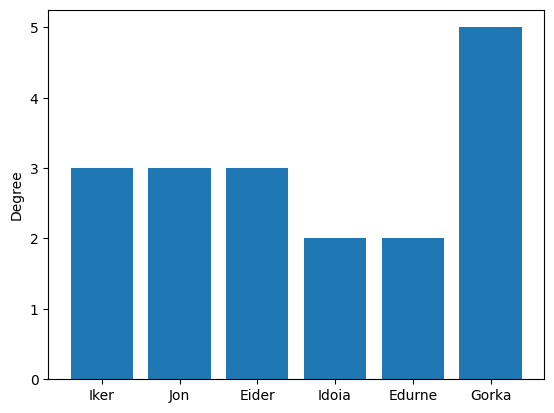

In [19]:
# Degree of each node with NetworkX method
print('-- Degrees calculated by NetworkX\n')
print(list(G.degree()))

# Add together the columns of the adjacency matrix
print('\n-- Sum of the **columns** of the adjacency matrix\n')
print(annotated_A.sum(axis=1))

# Add together the rows of the adjacency matrix
print('\n-- Sum of the **rows** of the adjacency matrix\n')
print(annotated_A.sum(axis=0))

# You can also plot the degrees:
print('\n-- Plotting the degree as bars: \n')
degrees = annotated_A.sum(axis=1)
plt.bar(degrees.index, degrees.values)
plt.ylabel('Degree')
plt.show()

### Graph clustering
Graph clustering is a measure of the extent to which nodes in a graph tend to cluster together. There are at least two clustering coefficients, we will focus mostly on the local clustering.
* **Local clustering**: How close is this node to belong to an all-to-all connected subnetwork? This measure is applied to each node in the network independently. It was suggested by Watts and Strogatz in 1998.

    <img src="https://upload.wikimedia.org/wikipedia/commons/thumb/0/0f/Clustering_coefficient_example.svg/320px-Clustering_coefficient_example.svg.png" width="60">
    
* **Global clustering**: A global measure of how "clustered" the network is. Often measured as a ratio of triples (present/possible), but can also be approximated as the mean local clustering of all nodes. We do not focus on global clustering in this tutorial.

In [20]:
# Local clustering can be easily calculated with this built-in networkX function
nx.clustering(G)

{'Iker': 0.6666666666666666,
 'Jon': 0.6666666666666666,
 'Eider': 0.6666666666666666,
 'Idoia': 1.0,
 'Edurne': 1.0,
 'Gorka': 0.4}

### Shortest path(s)
One very useful application of graphs is to find the shortest path between two nodes. This can mean searching for the ideal walking route in a map to get to your friend's house or the shortest path information would have to travel trough the brain.

Given nodes $a$ and $b$ he shortest path is the minimum number of edges one has to travel through to reach $a$ from $b$ (or $b$ from $a$ since we are still working on undirected graphs.

There are many algorithms to compute shortest paths, each best suited for different types of graphs and sizes. The most popular algorithm is [Dijkstra's algorithm](https://en.wikipedia.org/wiki/Dijkstra%27s_algorithm). In fact, this algorithm is the default for shortest paths in NetworkX.

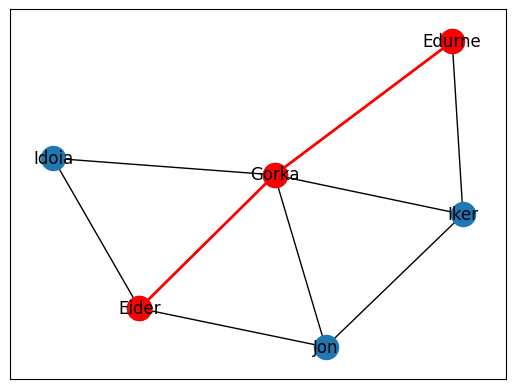

In [21]:
# Get the shortest path between two nodes
path = nx.shortest_path(G, source='Eider', target='Edurne', method='dijkstra')

# Plotting the graph
pos = nx.spring_layout(G)
nx.draw_networkx(G, pos, with_labels=True)

# This draws the path
nx.draw_networkx_nodes(G, pos, nodelist=path, node_color='r')
path_edges =[(a, b) for a,b in zip(path, path[1:])]
nx.draw_networkx_edges(G, pos, edgelist=path_edges, edge_color='r', width=2)

The shortest path algorithm is capable of finding the distance between two nodes, but it can also just create a dictionary of all possible paths:
* `nx.all_pairs_shortest_path` - calculates the shortest paths between all nodes in an **unweighted** graph
* `nx.all_pairs_shortest_path_length` - calculates the lengths of the shortest paths between all nodes in an **unweighted** graph
* `nx.all_pairs_dijkstra_path` - calculates the shortest paths between all nodes in a **weighted** graph
* `nx.all_pairs_dijkstra_path_length` - calculates the lengths of the shortest paths between all nodes in a **weighted** graph

In [22]:
# Get all shortests paths from all nodes to all other nodes
# Dijkstra's algorithm is used (it is the default!)
shortest_paths_tree = nx.all_pairs_shortest_path(G)  

# `shortest_paths_tree` is a generator, iterate over it to get the values or convert it to a list
list(shortest_paths_tree)

[('Iker',
  {'Iker': ['Iker'],
   'Jon': ['Iker', 'Jon'],
   'Edurne': ['Iker', 'Edurne'],
   'Gorka': ['Iker', 'Gorka'],
   'Eider': ['Iker', 'Jon', 'Eider'],
   'Idoia': ['Iker', 'Gorka', 'Idoia']}),
 ('Jon',
  {'Jon': ['Jon'],
   'Iker': ['Jon', 'Iker'],
   'Eider': ['Jon', 'Eider'],
   'Gorka': ['Jon', 'Gorka'],
   'Edurne': ['Jon', 'Iker', 'Edurne'],
   'Idoia': ['Jon', 'Eider', 'Idoia']}),
 ('Eider',
  {'Eider': ['Eider'],
   'Jon': ['Eider', 'Jon'],
   'Idoia': ['Eider', 'Idoia'],
   'Gorka': ['Eider', 'Gorka'],
   'Iker': ['Eider', 'Jon', 'Iker'],
   'Edurne': ['Eider', 'Gorka', 'Edurne']}),
 ('Idoia',
  {'Idoia': ['Idoia'],
   'Eider': ['Idoia', 'Eider'],
   'Gorka': ['Idoia', 'Gorka'],
   'Jon': ['Idoia', 'Eider', 'Jon'],
   'Iker': ['Idoia', 'Gorka', 'Iker'],
   'Edurne': ['Idoia', 'Gorka', 'Edurne']}),
 ('Edurne',
  {'Edurne': ['Edurne'],
   'Iker': ['Edurne', 'Iker'],
   'Gorka': ['Edurne', 'Gorka'],
   'Jon': ['Edurne', 'Iker', 'Jon'],
   'Eider': ['Edurne', 'Gorka', 'Eid

In [23]:
# You can also get the path lengths
list(nx.all_pairs_shortest_path_length(G))

[('Iker',
  {'Iker': 0, 'Jon': 1, 'Edurne': 1, 'Gorka': 1, 'Eider': 2, 'Idoia': 2}),
 ('Jon',
  {'Jon': 0, 'Iker': 1, 'Eider': 1, 'Gorka': 1, 'Edurne': 2, 'Idoia': 2}),
 ('Eider',
  {'Eider': 0, 'Jon': 1, 'Idoia': 1, 'Gorka': 1, 'Iker': 2, 'Edurne': 2}),
 ('Idoia',
  {'Idoia': 0, 'Eider': 1, 'Gorka': 1, 'Jon': 2, 'Iker': 2, 'Edurne': 2}),
 ('Edurne',
  {'Edurne': 0, 'Iker': 1, 'Gorka': 1, 'Jon': 2, 'Eider': 2, 'Idoia': 2}),
 ('Gorka',
  {'Gorka': 0, 'Iker': 1, 'Jon': 1, 'Eider': 1, 'Idoia': 1, 'Edurne': 1})]

### Betweenness centrality
Betweenness centrality measures how many of all the possible shortest paths cross any given node. It takes all pairs of nodes and calculates all the shortest paths. 

A high coefficient indicates that a node is very "central" to the node, somehow like the main intersection in a city that you have to pass through to get from one place to another.

In [24]:
# Betweenness centrality
nx.betweenness_centrality(G)

{'Iker': 0.05,
 'Jon': 0.05,
 'Eider': 0.05,
 'Idoia': 0.0,
 'Edurne': 0.0,
 'Gorka': 0.45}

### Rich club coefficient
This coefficient searches for sub-groups of nodes which are more connected to each other than they are connected to the rest of the graph. It is a measure of the entire graph.

The measure emerged from the realization that rich people would be more likely to be connected to each other in social networks. 

Note: A fully connected subset of a graph is called a `clique`. Rich clubs differ from cliques in that they are more loosely defined.

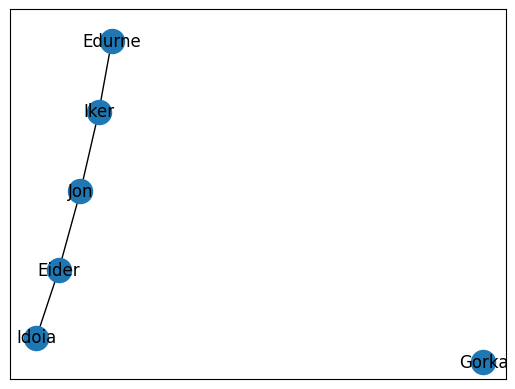

{0: 1.0, 1: 1.0}

In [25]:
# --> ERROR: Not implemented for graphs with self loops
# We remove one node to avoid self loops: 
G.remove_node('Gorka')
G.add_node('Gorka')
nx.rich_club_coefficient(G)  

nx.draw_networkx(G, with_labels=True)
plt.show()
nx.rich_club_coefficient(G)

[Link](https://networkx.github.io/documentation/stable/reference/algorithms/generated/networkx.algorithms.richclub.rich_club_coefficient.html#networkx.algorithms.richclub.rich_club_coefficient)  to documentation of rich club coefficient function 

## Weighted graphs
Weighted graphs have some sort of quantity that scales the edges on a graph. This can be the distance between some nodes or the strength of a connection in the brain. Most of the metrics from unweighted graphs can be generalized to weighted graphs by including the weight into the calculations.

One notable difference in weighted graphs is that the node Degree is called **node Intensity** (sum of edge weights). 

In general, negative weights present challenges of their own and will not work for many standard algorithms.


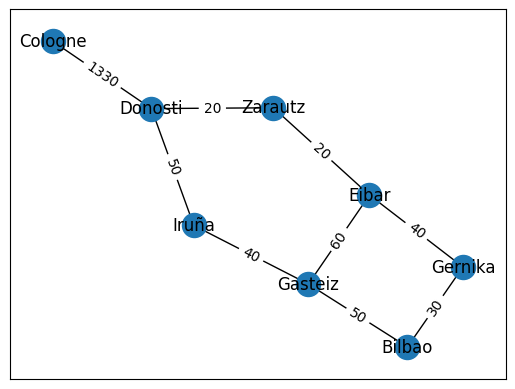

In [26]:
# Let us build a graph with some Basque cities
# We use the (rough) distances between them as weights
G = nx.Graph()
G.add_nodes_from(['Gernika', 'Donosti', 'Bilbao', 'Gasteiz', 'Eibar', 'Zarautz', 'Iruña', 'Cologne'])

'''
Any keyword argument passed to an edge can be treated as a weight

NOTE: any keyword argument can be a weight, you can also have multiple weights.
'''
G.add_edge('Gernika', 'Bilbao', distance=30)
G.add_edge('Gernika', 'Eibar', distance=40)
G.add_edge('Eibar', 'Zarautz', distance=20)
G.add_edge('Eibar', 'Gasteiz', distance=60)
G.add_edge('Donosti', 'Zarautz', distance=20)
G.add_edge('Bilbao', 'Gasteiz', distance=50)
G.add_edge('Iruña', 'Gasteiz', distance=40)
G.add_edge('Iruña', 'Donosti', distance=50)
G.add_edge('Cologne', 'Donosti', distance=1330)

'''
One can define at which position each node should be plotted
This can be done manually when creating the nodes:
>>> G.add_node(label, pos=(x,y))
...
>>> pos = nx.get_node_attributes(G, 'pos')

Or much more conveniently, using some optimized algorithm like
>> nx.spring_layout(G)
'''
# The sring layout positions nodes as far apart from each other as it can;
# other positioning algorithms exist, they are only relevant for plotting.
pos = nx.spring_layout(G)    

nx.draw_networkx(G, pos, with_labels=True)

# Additionally we can print the edge weights
labels = nx.get_edge_attributes(G,'distance')
foo = nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)

In [27]:
# Adjacency matrix
A = nx.adjacency_matrix(G, weight='distance')
annotated_A = pd.DataFrame(A.todense(), index=G.nodes, columns=G.nodes)
print(annotated_A)

         Gernika  Donosti  Bilbao  Gasteiz  Eibar  Zarautz  Iruña  Cologne
Gernika        0        0      30        0     40        0      0        0
Donosti        0        0       0        0      0       20     50     1330
Bilbao        30        0       0       50      0        0      0        0
Gasteiz        0        0      50        0     60        0     40        0
Eibar         40        0       0       60      0       20      0        0
Zarautz        0       20       0        0     20        0      0        0
Iruña          0       50       0       40      0        0      0        0
Cologne        0     1330       0        0      0        0      0        0


In [28]:
# Degree
print('-- Degrees:')
print(list(G.degree()))

# Intensity
print('\n-- Intensity of weighted graph (a.k.a. intensity):')
print(list(G.degree(weight='distance')))

-- Degrees:
[('Gernika', 2), ('Donosti', 3), ('Bilbao', 2), ('Gasteiz', 3), ('Eibar', 3), ('Zarautz', 2), ('Iruña', 2), ('Cologne', 1)]

-- Intensity of weighted graph (a.k.a. intensity):
[('Gernika', 70), ('Donosti', 1400), ('Bilbao', 80), ('Gasteiz', 150), ('Eibar', 120), ('Zarautz', 40), ('Iruña', 90), ('Cologne', 1330)]


In [29]:
# Clustering coefficient
print('Clustering without regarding weight:')
print(nx.clustering(G))

# Weighted clustering coefficient
print('\nClustering of weighted graph:')
print(nx.clustering(G, weight='distance'))

Clustering without regarding weight:
{'Gernika': 0, 'Donosti': 0, 'Bilbao': 0, 'Gasteiz': 0, 'Eibar': 0, 'Zarautz': 0, 'Iruña': 0, 'Cologne': 0}

Clustering of weighted graph:
{'Gernika': 0, 'Donosti': 0, 'Bilbao': 0, 'Gasteiz': 0, 'Eibar': 0, 'Zarautz': 0, 'Iruña': 0, 'Cologne': 0}


In [30]:
# Getting the shortest (weighted) paths between all the cities
path_lengths = nx.all_pairs_dijkstra_path(G, weight='distance')
list(path_lengths)

[('Gernika',
  {'Gernika': ['Gernika'],
   'Bilbao': ['Gernika', 'Bilbao'],
   'Eibar': ['Gernika', 'Eibar'],
   'Gasteiz': ['Gernika', 'Bilbao', 'Gasteiz'],
   'Zarautz': ['Gernika', 'Eibar', 'Zarautz'],
   'Donosti': ['Gernika', 'Eibar', 'Zarautz', 'Donosti'],
   'Iruña': ['Gernika', 'Bilbao', 'Gasteiz', 'Iruña'],
   'Cologne': ['Gernika', 'Eibar', 'Zarautz', 'Donosti', 'Cologne']}),
 ('Donosti',
  {'Donosti': ['Donosti'],
   'Zarautz': ['Donosti', 'Zarautz'],
   'Iruña': ['Donosti', 'Iruña'],
   'Cologne': ['Donosti', 'Cologne'],
   'Eibar': ['Donosti', 'Zarautz', 'Eibar'],
   'Gernika': ['Donosti', 'Zarautz', 'Eibar', 'Gernika'],
   'Gasteiz': ['Donosti', 'Iruña', 'Gasteiz'],
   'Bilbao': ['Donosti', 'Zarautz', 'Eibar', 'Gernika', 'Bilbao']}),
 ('Bilbao',
  {'Bilbao': ['Bilbao'],
   'Gernika': ['Bilbao', 'Gernika'],
   'Gasteiz': ['Bilbao', 'Gasteiz'],
   'Eibar': ['Bilbao', 'Gernika', 'Eibar'],
   'Iruña': ['Bilbao', 'Gasteiz', 'Iruña'],
   'Zarautz': ['Bilbao', 'Gernika', 'Eibar'

In [31]:
# Getting the shortest distances between all the cities
path_lengths = nx.all_pairs_dijkstra_path_length(G, weight='distance')
list(path_lengths)

[('Gernika',
  {'Gernika': 0,
   'Bilbao': 30,
   'Eibar': 40,
   'Zarautz': 60,
   'Gasteiz': 80,
   'Donosti': 80,
   'Iruña': 120,
   'Cologne': 1410}),
 ('Donosti',
  {'Donosti': 0,
   'Zarautz': 20,
   'Eibar': 40,
   'Iruña': 50,
   'Gernika': 80,
   'Gasteiz': 90,
   'Bilbao': 110,
   'Cologne': 1330}),
 ('Bilbao',
  {'Bilbao': 0,
   'Gernika': 30,
   'Gasteiz': 50,
   'Eibar': 70,
   'Iruña': 90,
   'Zarautz': 90,
   'Donosti': 110,
   'Cologne': 1440}),
 ('Gasteiz',
  {'Gasteiz': 0,
   'Iruña': 40,
   'Bilbao': 50,
   'Eibar': 60,
   'Gernika': 80,
   'Zarautz': 80,
   'Donosti': 90,
   'Cologne': 1420}),
 ('Eibar',
  {'Eibar': 0,
   'Zarautz': 20,
   'Gernika': 40,
   'Donosti': 40,
   'Gasteiz': 60,
   'Bilbao': 70,
   'Iruña': 90,
   'Cologne': 1370}),
 ('Zarautz',
  {'Zarautz': 0,
   'Eibar': 20,
   'Donosti': 20,
   'Gernika': 60,
   'Iruña': 70,
   'Gasteiz': 80,
   'Bilbao': 90,
   'Cologne': 1350}),
 ('Iruña',
  {'Iruña': 0,
   'Gasteiz': 40,
   'Donosti': 50,
   'Zara

### Directed graphs
To create a directed graph you have to use `nx.DiGraph`:

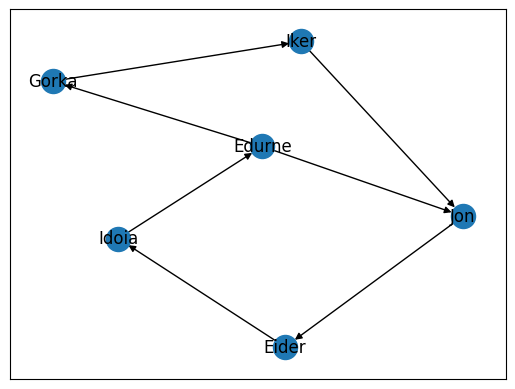

In [32]:
# The new graph is an instance of nx.DiGraph instead of nx.Graph
G = nx.DiGraph()
G.add_nodes_from(['Iker', 'Jon', 'Eider', 'Idoia', 'Edurne', 'Gorka'])

'''
When generating edges the order of your nodes now matters:
* Source: first tuple element
* Target: second tuple element

So that: edge = (source, target)
'''
G.add_edges_from([('Iker', 'Jon'), ('Jon', 'Eider'), 
                  ('Eider', 'Idoia'), ('Idoia', 'Edurne'), 
                  ('Edurne', 'Gorka'), ('Gorka', 'Iker'), 
                  ('Edurne', 'Jon')])
nx.draw_networkx(G, with_labels=True)

#### The adjacency matrix of a directed graph is not symmetric!

In [ ]:
# Adjacency matrix
A = nx.adjacency_matrix(G)
annotated_A = pd.DataFrame(A.todense(), index=G.nodes, columns=G.nodes)
print(annotated_A)

#### Indegrees and Outdegrees
The degree distribution can now also be directed. If you use the `G.degree` you get the degrees for the corresponding **undirected** graph, `undirected graph degree = indegree + outdegree`

In [ ]:
print('Indegree\t', G.in_degree)
print('Outdegree\t',G.out_degree)
print('Degree\t\t',G.degree)

## Creating a random (directed) graph

NetworkX offers a ton of [graph generating functions](https://networkx.github.io/documentation/networkx-2.3/reference/generators.html)!

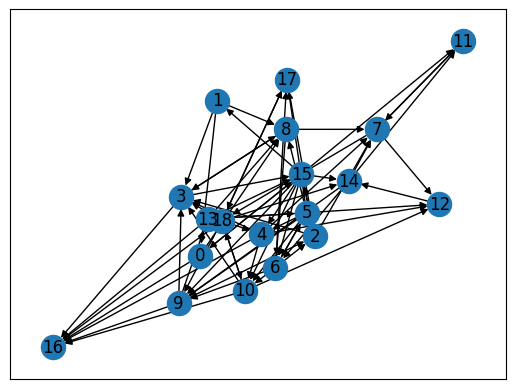

In [13]:
# A more realistic network
G_r = nx.fast_gnp_random_graph(n=19, p=0.2, seed=None, directed=True)
nx.draw_networkx(G_r, with_labels=True)
plt.show()
# print("**Documentation for nx.fast_gnp_random_graph**")
# print(nx.fast_gnp_random_graph.__doc__)


-- This is a numpy matrix:

[[0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0]
 [1 0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1 1 0 0]
 [0 0 0 1 0 0 0 1 0 0 1 0 1 0 0 0 1 0 0]
 [0 0 0 0 1 0 1 0 1 1 1 0 1 1 0 0 0 1 0]
 [0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0 0 1 0]
 [0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 1]
 [0 0 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 1 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 1 1 0 0]
 [0 0 0 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0]
 [1 1 1 0 1 0 1 0 0 1 1 1 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1]
 [0 0 0 1 1 0 0 0 0 1 1 0 0 0 1 0 1 1 0]]


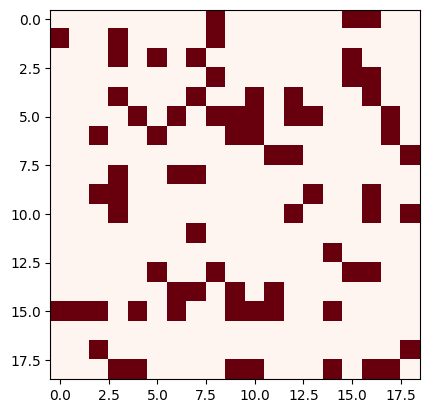

In [23]:
# Adjacency matrix
A = nx.adjacency_matrix(G_r).todense()
print('\n-- This is a numpy matrix:\n')
print(A)

# Plotting
plt.imshow(A, cmap='Reds')